In [37]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import sys
sys.path.append("/exp/home/wuchty/pytorchviz")
from torchviz import make_dot, make_dot_from_trace


In [38]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.d1 = nn.Linear(26*26*32,128)
        self.d2 = nn.Linear(128,10)
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = x.view(-1, 26*26*32)
        x = self.d1(x)
        return self.d2(x)


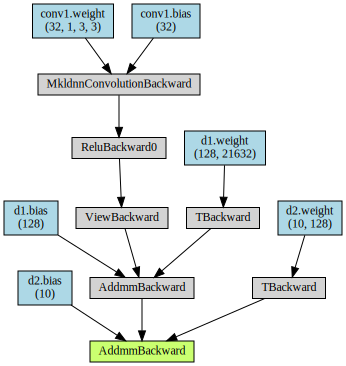

In [47]:
from torchvision import models
#inputs = torch.randn(1,3,224,224)
#resnet18 = models.resnet18()
#y = resnet18(inputs)
#g = make_dot(y, resnet18.state_dict())
inputs = torch.randn(1,1,28,28)
net = MyModel()
net.zero_grad()
y = net(inputs)
# print(y)
g = make_dot(y, dict(net.named_parameters()))

g.view()
g

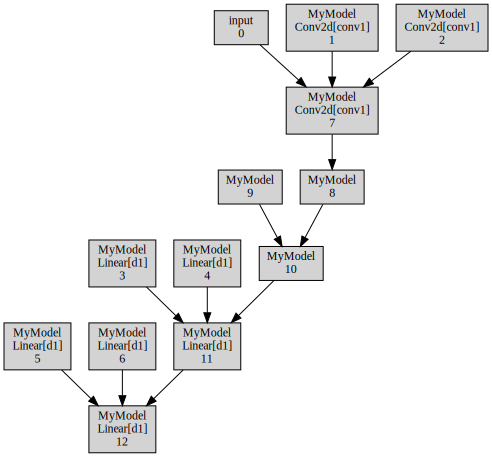

In [31]:
with torch.onnx.set_training(net, False):
    trace, _ = torch.jit.get_trace_graph(net, args=(inputs,))
make_dot_from_trace(trace)


In [40]:
#%load_ext tensorboard
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


32


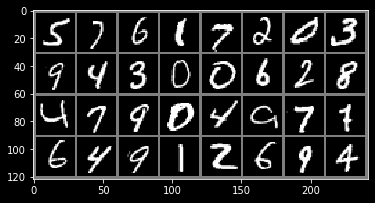

In [44]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torchvision
import numpy as np
batch_size =32
batch_size =32
train_loader = DataLoader(
        datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,), (0.5,))
                       ])),
        batch_size=batch_size, shuffle=True,)
test_loader = DataLoader(
        datasets.MNIST('./data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,), (0.5,))
                       ])),
        batch_size=batch_size, shuffle=True,)

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(len(images))
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
# show images
grid = torchvision.utils.make_grid(images)
imshow(grid)


In [45]:
writer.add_image('images', grid, 0)
writer.add_graph(net, images)
writer.close()


In [36]:
#%tensorboard --logdir=runs


Reusing TensorBoard on port 6006 (pid 125132), started 0:10:18 ago. (Use '!kill 125132' to kill it.)